# Notebook: APED system

We first setup the notebook for plotting inline, in svg format

In [1]:
import matplotlib.pyplot as P
import numpy as N
from IPython.display import set_matplotlib_formats, Code

%matplotlib inline
set_matplotlib_formats('svg')


We then tune the figure parameters

In [2]:
P.rcParams["figure.figsize"] = (12, 9)
P.rcParams['image.cmap'] = "seismic" # palette for good contrast
P.rc("font", size=16)

We tune the display of pandas dataframes:

In [3]:
import pandas as pd
pd.options.display.max_columns = 8


At last, the ResultReader from metadynamic package is loaded

In [4]:
from metadynamic import ResultReader, __version__
print(f"metadynamic version: {__version__}")


metadynamic version: 1.0.3


## Load result

Results from a simulation are loaded

In [5]:
res = ResultReader("APED.hdf5")

Informations from the run can be printed

In [6]:
nbthread = res.size
end = res.params.attrs["tend"]
print(res.printinfo)

----------------
Simple APED model
----------------
metadynamic version 1.0.2, ran on 28 threads on srvperso-polyphos
from [07.05.2020-16:22:59] to 16:43:47, 07/05/20
results saved in 'APED.hdf5'
----------------
#0: ending n°10 at runtime t=1156.44873046875s; Time is up -> t=1000.0000371787414
#1: ending n°10 at runtime t=1156.8402099609375s; Time is up -> t=1000.0001268631224
#2: ending n°10 at runtime t=1248.035888671875s; Time is up -> t=1000.0000067094029
#3: ending n°10 at runtime t=1207.2979736328125s; Time is up -> t=1000.0000205138182
#4: ending n°10 at runtime t=1193.865478515625s; Time is up -> t=1000.000033471578
#5: ending n°10 at runtime t=1171.0555419921875s; Time is up -> t=1000.0000387686962
#6: ending n°10 at runtime t=1138.5628662109375s; Time is up -> t=1000.0000927956401
#7: ending n°10 at runtime t=1110.304931640625s; Time is up -> t=1000.0000059714436
#8: ending n°10 at runtime t=1186.95947265625s; Time is up -> t=1000.00011779632
#9: ending n°10 at runtime t=118

## Data tables

A data summary can be obtained:

In [7]:
res.table()

,0,1,2,3,...,197,198,199,200
thread,13.500000,13.500000,13.500000,13.500000,...,1.350000e+01,1.350000e+01,1.350000e+01,1.350000e+01
ptime,0.062327,9.632211,20.142990,30.693216,...,1.159305e+03,1.163905e+03,1.168750e+03,1.173568e+03
memuse,143.893417,144.038498,144.086914,144.129883,...,1.446843e+02,1.446908e+02,1.447094e+02,1.447218e+02
step,0.000000,1.000000,2.000000,3.000000,...,1.970000e+02,1.980000e+02,1.990000e+02,2.000000e+02
dstep,0.000000,74388.039062,143442.750000,212747.640625,...,1.671940e+07,1.680704e+07,1.689474e+07,1.698237e+07
time,0.000000,5.000053,10.000070,15.000090,...,9.850000e+02,9.900001e+02,9.950000e+02,1.000000e+03
a,1.500000,0.334564,0.336621,0.336188,...,3.765375e-01,3.758732e-01,3.739553e-01,3.759857e-01
aa,0.000000,0.193457,0.190923,0.190479,...,2.237893e-01,2.235589e-01,2.238964e-01,2.236554e-01
aaa,0.000000,0.045386,0.044416,0.044475,...,5.785714e-02,5.798036e-02,5.809286e-02,5.813571e-02
aaaa,0.000000,0.007296,0.007623,0.007055,...,1.016786e-02,1.001786e-02,9.948215e-03,9.996428e-03


In [8]:
## Chemical reaction networks

We can check the CRN before bifurcation...

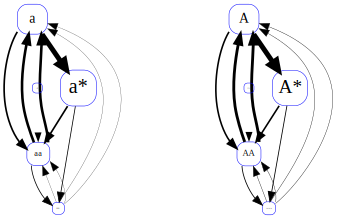

In [9]:
res.getsnap(3,0)

... and after bifurcation

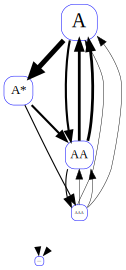

In [10]:
res.getsnap(3,-1)

## Results: plotting

We can plot time evolution of compounds (per thread and average behavior)

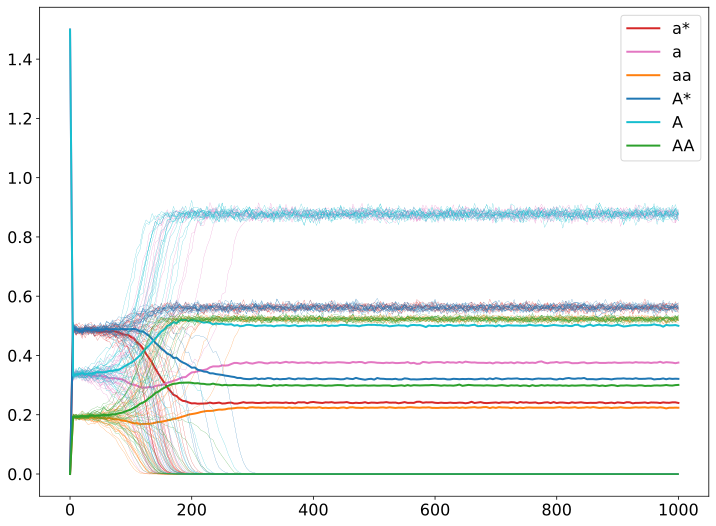

In [11]:
complist = ["a*", "a", "aa", "A*", "A", "AA"]
colorlist = ["tab:red", "tab:pink", "tab:orange", "tab:blue", "tab:cyan", "tab:green"]

for name, color in zip(complist, colorlist):
    P.plot(*res.x_y_proc(name), linewidth=0.2, color=color)
    P.plot(*res.x_y(name, method="p1"), linewidth=0.2, color=color)    
    P.plot(*res.x_y(name), linewidth=2, color=color, label=name)
    

P.legend()



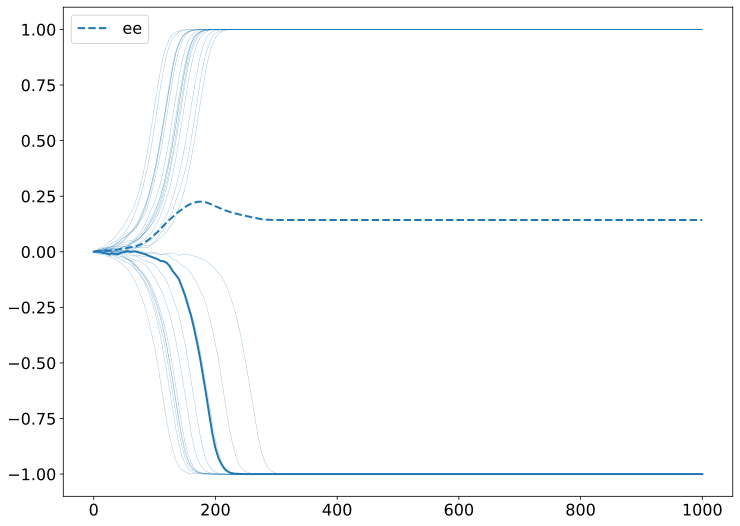

In [12]:
for i in range(nbthread):
    P.plot(res.get("time", method=f"p{i}"), res.get("asym", method=f"p{i}")/res.get("tot_m", method=f"p{i}"), linewidth=0.2, color="tab:blue", label="")
P.plot(res.get("time", method=f"p{i}"), res.get("asym", method=f"p{i}")/res.get("tot_m", method=f"p{i}"), linewidth=2, color="tab:blue", label="")
P.plot(res.get("time", method="m"), res.get("asym", method="m")/res.get("tot_m", method="m"), "--", linewidth=2, color="tab:blue", label="ee")

P.legend()

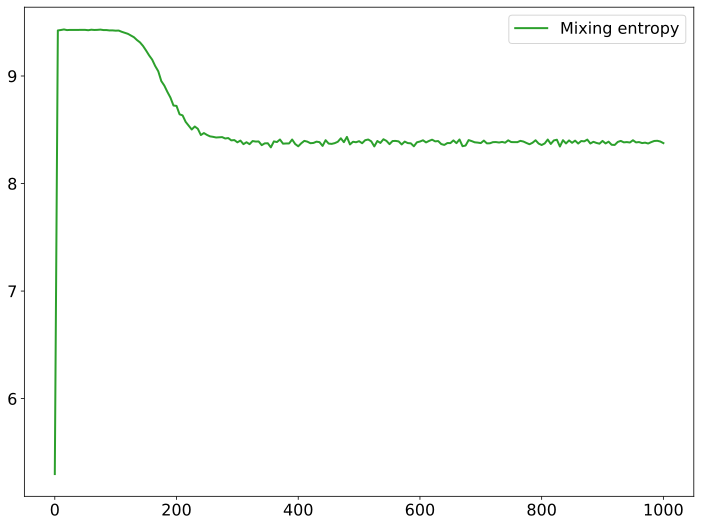

In [13]:
P.plot(res["time"], N.log(res["tot_c"])-res["mix_entro"]/res["tot_c"], linewidth=2, color="tab:green", label="Mixing entropy")

P.legend();


## Code

Simulation ruleset code:

In [14]:
Code(filename="aped.py")

#!/usr/bin/env python3
# -*- coding: utf-8 -*-
#
# Copyright 2019 by Raphaël Plasson
#
# This file is part of metadynamic
#
# This program is free software; you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation; either version 3 of the License, or
# (at your option) any later version.
#
# This program is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
# GNU General Public License for more details.
#
# You should have received a copy of the GNU General Public License
# along with this program; if not, see <http://www.gnu.org/licenses/>.

"""APED model definition module

This system is defined by:
 - Activation reaction; e.g.  A -> A*
 - Activated polymerisation reaction; e.g.  A* + BcD -> ABcD
 - Epimerization reaction; e.g.  ABcD -> aBcD
 - Depolymerization reaction; e.g.  aBcD -> aBc + D
"""

from typing import Dict, Any

from metadynamic.ruleset import (
    Categorizer,
    Propertizer,
    ProdBuilder,
    ConstBuilder,
    VariantBuilder,
    Compset,
    kalternate,
    kdualchoice,
    novariant_gen,
    singlevariant,
    rangevariant,
)

# Definition of Categorizer functions

polym: Categorizer = lambda name: name.isalpha()
"""Definition of a polymer

Return True if the name is an alphabetic string:
>>> polym("AaDcs")
True
>>> polym("A2")
False
"""

mono: Categorizer = lambda name: polym(name) and len(name) == 1
"""Definition of a monomer

Return True if the name is polymer of length one:
>>> mono("Abc")
False
>>> mono("b")
True
"""

actpol: Categorizer = lambda name: name[-1] == "*" and name[:-1].isalpha()
"""Definition of an activated polymer

Return True if the name is an alphabetic string + a '*' char at its end:
>>> actpol("AbcD")
False
>>> actpol("Abcd*")
True
"""


actmono: Categorizer = lambda name: actpol(name) and len(name) == 2
"""Definition of an activated monomer

Return True is the name is an activated polymer of length 2:
>>> actmono("Abcd*")
False
>>> actmono("A*")
True
"""

longpol: Categorizer = lambda name: polym(name) and len(name) > 1
"""Definition of a long polymer

Return True if the name is a polymer of length 2 or more:
>>> longpol("A")
False
>>> longpol("Abcd")
True
"""

# Propertizer

length: Propertizer = lambda name: (
    1 if mono(name) else len(name) if polym(name) else len(name) - 1 if actpol(name) else 0
)


def asym(name: str) -> int:  # Propertizer
    res = 0
    for char in name:
        if char.isupper():
            res += 1
        elif char.islower():
            res -= 1
    return res


right: Categorizer = lambda name: asym(name) > 0
left: Categorizer = lambda name: asym(name) < 0

# ProdBuilder

cut: ProdBuilder = lambda names, variant: (names[0][:variant], names[0][variant:])
act_polym: ProdBuilder = lambda names, variant: (names[0][:-1] + names[1],)
activ: ProdBuilder = lambda names, variant: (names[0] + "*",)
epimer: ProdBuilder = lambda names, variant: (
    names[0][:variant] + names[0][variant].swapcase() + names[0][variant + 1 :],
)


# ConstBuilder


def samecase(one: str, two: str) -> bool:
    return (one.islower() and two.islower()) or (one.isupper() and two.isupper())


def samebefore(names: Compset, variant: int) -> bool:
    name = names[0]
    return variant < (length(name) - 1) and samecase(name[variant], name[variant + 1])


def sameafter(names: Compset, variant: int) -> bool:
    name = names[0]
    return (variant > 0) and samecase(name[variant], name[variant - 1])


kpola: ConstBuilder = kalternate(
    condition=lambda names, variant: samecase(names[0][-2], names[1][0]),
    name_t="kpola_same",
    name_f="kpola_diff",
)

kact: ConstBuilder = kalternate(
    condition=lambda names, variant: length(names[0]) == 1,
    name_t="kact_mono",
    name_f="kact_pol",
)

khyd: ConstBuilder = kalternate(
    condition=lambda names, variant: samecase(

Simulation parameters:

In [15]:
res.parameters.asdict()

{'name': 'APED',
 'comment': 'Simple APED model',
 'savedir': '',
 'logdir': 'testlog',
 'loglevel': 'INFO',
 'conc': 3.0,
 'init': {'A': 10000, 'a': 10000},
 'rulemodel': 'aped.py',
 'reactions': ['A', 'H', 'E', 'a'],
 'parameters': {'kact_mono': 1.0,
  'kepi_diff': 1.0,
  'khyd_same': 1.0,
  'kpola_diff': 0.1,
  'kpola_same': 1.0},
 'tend': 1000.0,
 'tstep': 5.0,
 'sstep': 50.0,
 'rtlim': 6000.0,
 'maxsteps': 100000,
 'autoclean': True,
 'dropmode': 'drop',
 'gcperio': True,
 'sleeptime': 0.1,
 'maxmem': 90582,
 'maxmem_percent': 95,
 'save': ['a', 'aa', 'aaa', 'aaaa', 'A', 'Aa', 'aA', 'AA', 'a*', 'A*'],
 'stat': '/tmp/tmp57xzzsfy',
 'maps': '/tmp/tmpf9m5u343',
 'store_snapreac': False,
 'maxstrlen': 256,
 'lengrow': 20,
 'maxlog': 1000,
 'timeformat': '[%d.%m.%Y-%H:%M:%S]'}

In [16]:
res.statparam

{'asym': StatParam(prop='asym', weight='pop', method='+', full=False, collection='compounds'),
 'len_max': StatParam(prop='length', weight='count', method='max', full=False, collection='compounds'),
 'len_max_pool': StatParam(prop='length', weight='count', method='max', full=True, collection='compounds'),
 'len_mean': StatParam(prop='length', weight='count', method='m', full=False, collection='compounds'),
 'len_min': StatParam(prop='length', weight='count', method='min', full=False, collection='compounds'),
 'mix_entro': StatParam(prop='entropy', weight='count', method='m', full=False, collection='compounds'),
 'nbact': StatParam(prop='actpol', weight='pop', method='+', full=False, collection='compounds'),
 'nbcomp': StatParam(prop='count', weight='count', method='+', full=False, collection='compounds'),
 'nbreac': StatParam(prop='count', weight='count', method='+', full=False, collection='reactions'),
 'poolreac': StatParam(prop='count', weight='count', method='+', full=True, collect

In [17]:
res.mapparam

{'asymdist': MapParam(prop='asym', weight='pop', sort='length', method='+', full=False, collection='compounds'),
 'lendist': MapParam(prop='pop', weight='count', sort='length', method='+', full=False, collection='compounds'),
 'pooldist': MapParam(prop='pop', weight='count', sort='length', method='+', full=True, collection='compounds'),
 's_asymdist': MapParam(prop='asym', weight='single', sort='length', method='+', full=False, collection='compounds'),
 'slendist': MapParam(prop='pop', weight='single', sort='length', method='+', full=False, collection='compounds'),
 'wlendist': MapParam(prop='pop', weight='length', sort='length', method='+', full=False, collection='compounds')}